In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv

import src.read_weather as rw
from src.graphing_functions import get_average_per_state, get_julian_day_column

import julian
import datetime


In [13]:
txt_path = 'data/ghcnd-stations.txt'
path_2000= 'data/weather/2000.csv'

In [14]:
states=['CO','TX','WA','IL']
weather_data=rw.read_weather_data(path_2000)
meta_data= rw.read_metadata_txt(txt_path)

CO
TX
WA
IL


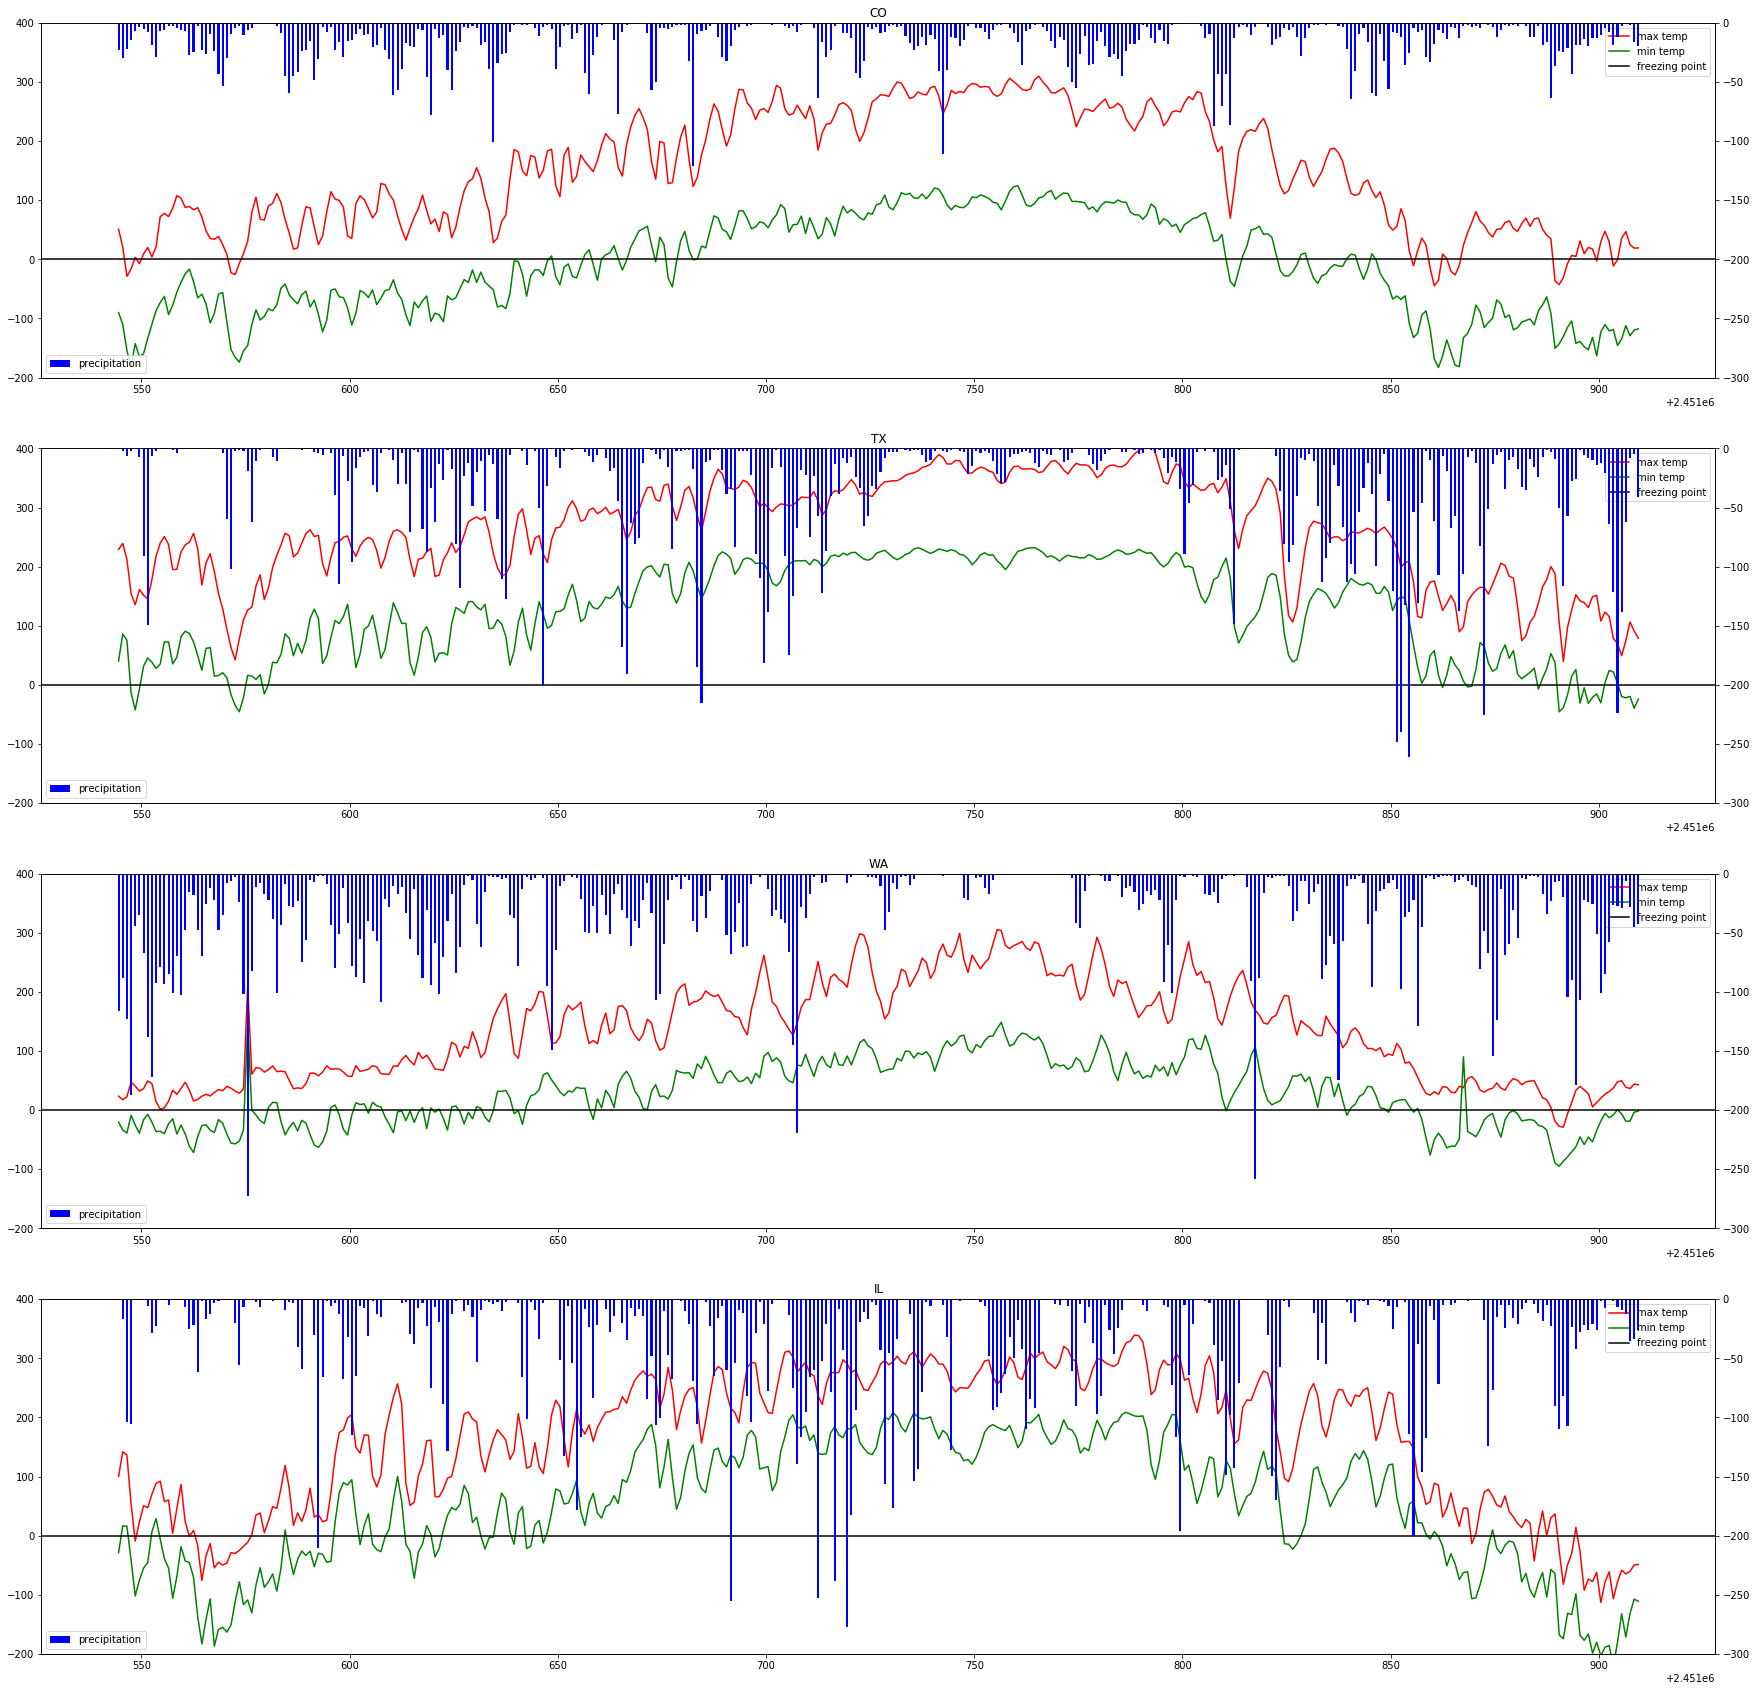

In [15]:
fig, axs = plt.subplots(4,1,figsize=(30,30))
for ax, state in zip(axs.flatten(),states):
    print(state)
    graph_4_real=get_average_per_state(meta_data,weather_data, state)
    julian_days = graph_4_real['julian'].values
    precip = graph_4_real['PRCP'].values
    max_t= graph_4_real['TMAX']
    min_t=graph_4_real['TMIN']
    
    #ax.plot(julian_days, precip, label='precipitation')
    ax.plot(julian_days, max_t,label='max temp', color='red')
    ax.plot(julian_days, min_t, label='min temp', color='green')
    ax.axhline(y=0, label='freezing point',color='black')
    ax2 = ax.twinx()
    ax2.bar(julian_days, -precip, 0.5,label='precipitation',color='blue')
    
    ax.set_ylim(-200,400)
    ax2.set_ylim(-300,0)
    
    ax.set_title(state)
    ax.legend()
    ax2.legend()